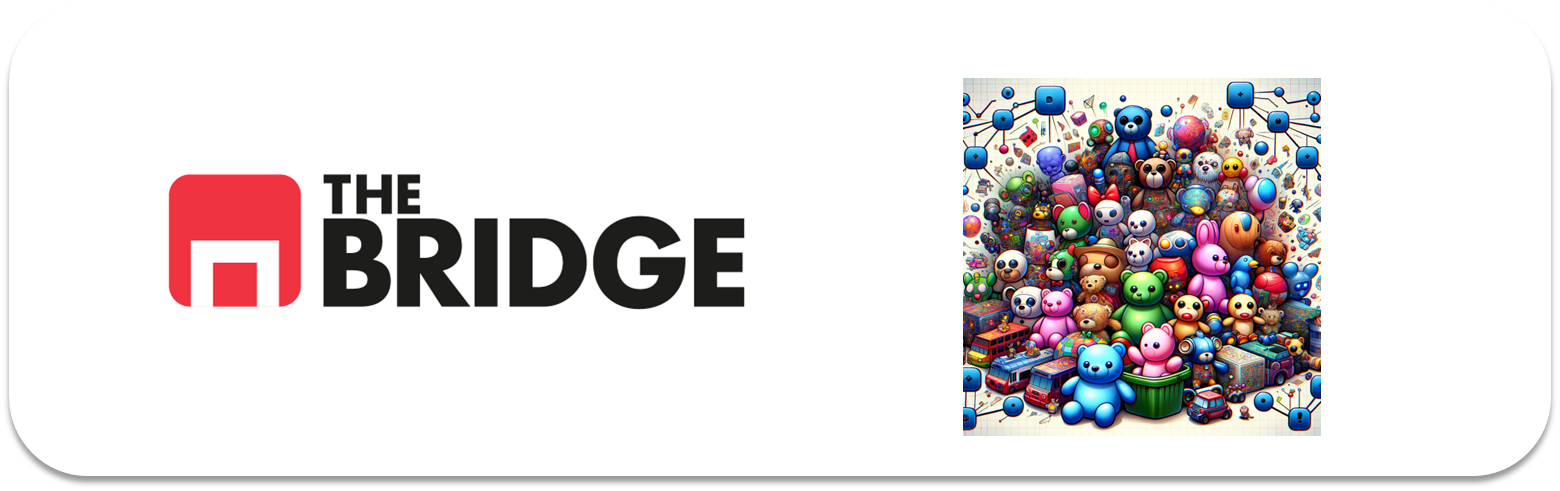

## PRACTICA OBLIGATORIA: **K-Means Clustering**

* La práctica obligatoria de esta unidad consiste en un ejercicio de modelado no supervisado sobre imágenes para practicar con el algoritmo k-means. Descarga este notebook en tu ordenador y trabaja en local. Ten en cuenta que tendrás que descar los directorios de imágenes y datos adicionales, si los hubiera.
* Recuerda que debes subirla a tu repositorio personal antes de la sesión en vivo para que puntúe adecuadamente.  
* Recuerda también que no es necesario que esté perfecta, sólo es necesario que se vea el esfuerzo. 
* Esta práctica se resolverá en la sesión en vivo correspondiente y la solución se publicará en el repo del curso. 

### Ejercicio 0

Importa los paquetes y módulos que necesites a lo largo del notebook

In [1]:
import matplotlib as plt
import numpy as np 
import pandas as pd 
import seaborn as sns
import matplotlib.figure as plt
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split

## **#1**

Vamos a trabajar con un dataset también entre los "clásicos" (aunque a veces menos conocido) que es el de rostros Olivetti. Este dataset contiene 400 imágenes en escala de grises de 64 × 64 píxeles de rostros.   


Como en otros datasets de imágenes, estás están "aplanadas" de forma que cada pixel es una feature y por cada imagen hay $64\times 64 = 4096$ features.  

Se fotografiaron 40 personas diferentes (10 veces cada una) y esas fotografías se recogen en el dataset.  

La tarea habitual es entrenar un modelo que pueda predecir qué persona está representada en cada imagen, pero nosotros lo vamos a hacer de forma no supervisada. 



### #1.1


Carga el conjunto de datos usando la función `sklearn.datasets.fetch_olivetti_faces()`. Recuerda que se carga un "diccionario". Muestra su descripción acudiendo a la clave "DESCR".

In [2]:
from sklearn.datasets import fetch_olivetti_faces
olivetti = fetch_olivetti_faces()

print(olivetti.DESCR)

.. _olivetti_faces_dataset:

The Olivetti faces dataset
--------------------------

`This dataset contains a set of face images`_ taken between April 1992 and
April 1994 at AT&T Laboratories Cambridge. The
:func:`sklearn.datasets.fetch_olivetti_faces` function is the data
fetching / caching function that downloads the data
archive from AT&T.

.. _This dataset contains a set of face images: https://cam-orl.co.uk/facedatabase.html

As described on the original website:

    There are ten different images of each of 40 distinct subjects. For some
    subjects, the images were taken at different times, varying the lighting,
    facial expressions (open / closed eyes, smiling / not smiling) and facial
    details (glasses / no glasses). All the images were taken against a dark
    homogeneous background with the subjects in an upright, frontal position
    (with tolerance for some side movement).

**Data Set Characteristics:**

=================   =====================
Classes              

### #1.2 

Aunque no lo vas a usar hasta el final de la práctica, muestra el target. Luego cargalo todo en un mismo dataframe (tendrás que añadir el target) y obtén otro dataset con todas las imagenes reordenadas aleatoriamente (emplea por ejemplo el método `sample` del dataframe o el método que tú quieras)

In [3]:
olivetti.target

array([ 0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  1,  1,  1,  1,  1,  1,  1,
        1,  1,  1,  2,  2,  2,  2,  2,  2,  2,  2,  2,  2,  3,  3,  3,  3,
        3,  3,  3,  3,  3,  3,  4,  4,  4,  4,  4,  4,  4,  4,  4,  4,  5,
        5,  5,  5,  5,  5,  5,  5,  5,  5,  6,  6,  6,  6,  6,  6,  6,  6,
        6,  6,  7,  7,  7,  7,  7,  7,  7,  7,  7,  7,  8,  8,  8,  8,  8,
        8,  8,  8,  8,  8,  9,  9,  9,  9,  9,  9,  9,  9,  9,  9, 10, 10,
       10, 10, 10, 10, 10, 10, 10, 10, 11, 11, 11, 11, 11, 11, 11, 11, 11,
       11, 12, 12, 12, 12, 12, 12, 12, 12, 12, 12, 13, 13, 13, 13, 13, 13,
       13, 13, 13, 13, 14, 14, 14, 14, 14, 14, 14, 14, 14, 14, 15, 15, 15,
       15, 15, 15, 15, 15, 15, 15, 16, 16, 16, 16, 16, 16, 16, 16, 16, 16,
       17, 17, 17, 17, 17, 17, 17, 17, 17, 17, 18, 18, 18, 18, 18, 18, 18,
       18, 18, 18, 19, 19, 19, 19, 19, 19, 19, 19, 19, 19, 20, 20, 20, 20,
       20, 20, 20, 20, 20, 20, 21, 21, 21, 21, 21, 21, 21, 21, 21, 21, 22,
       22, 22, 22, 22, 22

In [4]:
olivetti.images

array([[[0.30991736, 0.3677686 , 0.41735536, ..., 0.37190083,
         0.3305785 , 0.30578512],
        [0.3429752 , 0.40495867, 0.43801653, ..., 0.37190083,
         0.338843  , 0.3140496 ],
        [0.3429752 , 0.41735536, 0.45041323, ..., 0.38016528,
         0.338843  , 0.29752067],
        ...,
        [0.21487603, 0.20661157, 0.2231405 , ..., 0.15289256,
         0.16528925, 0.17355372],
        [0.20247933, 0.2107438 , 0.2107438 , ..., 0.14876033,
         0.16115703, 0.16528925],
        [0.20247933, 0.20661157, 0.20247933, ..., 0.15289256,
         0.16115703, 0.1570248 ]],

       [[0.45454547, 0.47107437, 0.5123967 , ..., 0.19008264,
         0.18595041, 0.18595041],
        [0.446281  , 0.48347107, 0.5206612 , ..., 0.21487603,
         0.2107438 , 0.2107438 ],
        [0.49586776, 0.5165289 , 0.53305787, ..., 0.20247933,
         0.20661157, 0.20661157],
        ...,
        [0.77272725, 0.78099173, 0.7933884 , ..., 0.1446281 ,
         0.1446281 , 0.1446281 ],
        [0.7

In [5]:
pd.DataFrame(olivetti.data)

,0,1,2,3,4,5,6,7,8,9,...,4086,4087,4088,4089,4090,4091,4092,4093,4094,4095
0,0.309917,0.367769,0.417355,0.442149,0.528926,0.607438,0.657025,0.677686,0.690083,0.685950,...,0.665289,0.669421,0.652893,0.661157,0.475207,0.132231,0.148760,0.152893,0.161157,0.157025
1,0.454545,0.471074,0.512397,0.557851,0.595041,0.640496,0.681818,0.702479,0.710744,0.702479,...,0.136364,0.157025,0.136364,0.148760,0.152893,0.152893,0.152893,0.152893,0.152893,0.152893
2,0.318182,0.400826,0.491736,0.528926,0.586777,0.657025,0.681818,0.685950,0.702479,0.698347,...,0.074380,0.132231,0.181818,0.136364,0.128099,0.148760,0.144628,0.140496,0.148760,0.152893
3,0.198347,0.194215,0.194215,0.194215,0.190083,0.190083,0.243802,0.404959,0.483471,0.516529,...,0.652893,0.636364,0.657025,0.685950,0.727273,0.743802,0.764463,0.752066,0.752066,0.739669
4,0.500000,0.545455,0.582645,0.623967,0.648760,0.690083,0.694215,0.714876,0.723140,0.731405,...,0.190083,0.161157,0.177686,0.173554,0.177686,0.177686,0.177686,0.177686,0.173554,0.173554
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
395,0.400826,0.495868,0.570248,0.632231,0.648760,0.640496,0.661157,0.636364,0.665289,0.698347,...,0.388430,0.396694,0.264463,0.099174,0.181818,0.243802,0.247934,0.161157,0.157025,0.136364
396,0.367769,0.367769,0.351240,0.301653,0.247934,0.247934,0.367769,0.512397,0.574380,0.628099,...,0.380165,0.334711,0.289256,0.285124,0.338843,0.404959,0.458678,0.487603,0.512397,0.549587
397,0.500000,0.533058,0.607438,0.628099,0.657025,0.632231,0.657025,0.669421,0.673554,0.702479,...,0.194215,0.148760,0.152893,0.161157,0.161157,0.173554,0.157025,0.177686,0.148760,0.190083
398,0.214876,0.219008,0.219008,0.223140,0.210744,0.202479,0.276859,0.400826,0.487603,0.549587,...,0.446281,0.392562,0.367769,0.409091,0.479339,0.524793,0.545455,0.574380,0.590909,0.603306


In [6]:
df_olivetti = pd.DataFrame(olivetti.data)

df_olivetti

,0,1,2,3,4,5,6,7,8,9,...,4086,4087,4088,4089,4090,4091,4092,4093,4094,4095
0,0.309917,0.367769,0.417355,0.442149,0.528926,0.607438,0.657025,0.677686,0.690083,0.685950,...,0.665289,0.669421,0.652893,0.661157,0.475207,0.132231,0.148760,0.152893,0.161157,0.157025
1,0.454545,0.471074,0.512397,0.557851,0.595041,0.640496,0.681818,0.702479,0.710744,0.702479,...,0.136364,0.157025,0.136364,0.148760,0.152893,0.152893,0.152893,0.152893,0.152893,0.152893
2,0.318182,0.400826,0.491736,0.528926,0.586777,0.657025,0.681818,0.685950,0.702479,0.698347,...,0.074380,0.132231,0.181818,0.136364,0.128099,0.148760,0.144628,0.140496,0.148760,0.152893
3,0.198347,0.194215,0.194215,0.194215,0.190083,0.190083,0.243802,0.404959,0.483471,0.516529,...,0.652893,0.636364,0.657025,0.685950,0.727273,0.743802,0.764463,0.752066,0.752066,0.739669
4,0.500000,0.545455,0.582645,0.623967,0.648760,0.690083,0.694215,0.714876,0.723140,0.731405,...,0.190083,0.161157,0.177686,0.173554,0.177686,0.177686,0.177686,0.177686,0.173554,0.173554
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
395,0.400826,0.495868,0.570248,0.632231,0.648760,0.640496,0.661157,0.636364,0.665289,0.698347,...,0.388430,0.396694,0.264463,0.099174,0.181818,0.243802,0.247934,0.161157,0.157025,0.136364
396,0.367769,0.367769,0.351240,0.301653,0.247934,0.247934,0.367769,0.512397,0.574380,0.628099,...,0.380165,0.334711,0.289256,0.285124,0.338843,0.404959,0.458678,0.487603,0.512397,0.549587
397,0.500000,0.533058,0.607438,0.628099,0.657025,0.632231,0.657025,0.669421,0.673554,0.702479,...,0.194215,0.148760,0.152893,0.161157,0.161157,0.173554,0.157025,0.177686,0.148760,0.190083
398,0.214876,0.219008,0.219008,0.223140,0.210744,0.202479,0.276859,0.400826,0.487603,0.549587,...,0.446281,0.392562,0.367769,0.409091,0.479339,0.524793,0.545455,0.574380,0.590909,0.603306


In [7]:
df_olivetti["cara"] = olivetti.target

df_olivetti

,0,1,2,3,4,5,6,7,8,9,...,4087,4088,4089,4090,4091,4092,4093,4094,4095,cara
0,0.309917,0.367769,0.417355,0.442149,0.528926,0.607438,0.657025,0.677686,0.690083,0.685950,...,0.669421,0.652893,0.661157,0.475207,0.132231,0.148760,0.152893,0.161157,0.157025,0
1,0.454545,0.471074,0.512397,0.557851,0.595041,0.640496,0.681818,0.702479,0.710744,0.702479,...,0.157025,0.136364,0.148760,0.152893,0.152893,0.152893,0.152893,0.152893,0.152893,0
2,0.318182,0.400826,0.491736,0.528926,0.586777,0.657025,0.681818,0.685950,0.702479,0.698347,...,0.132231,0.181818,0.136364,0.128099,0.148760,0.144628,0.140496,0.148760,0.152893,0
3,0.198347,0.194215,0.194215,0.194215,0.190083,0.190083,0.243802,0.404959,0.483471,0.516529,...,0.636364,0.657025,0.685950,0.727273,0.743802,0.764463,0.752066,0.752066,0.739669,0
4,0.500000,0.545455,0.582645,0.623967,0.648760,0.690083,0.694215,0.714876,0.723140,0.731405,...,0.161157,0.177686,0.173554,0.177686,0.177686,0.177686,0.177686,0.173554,0.173554,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
395,0.400826,0.495868,0.570248,0.632231,0.648760,0.640496,0.661157,0.636364,0.665289,0.698347,...,0.396694,0.264463,0.099174,0.181818,0.243802,0.247934,0.161157,0.157025,0.136364,39
396,0.367769,0.367769,0.351240,0.301653,0.247934,0.247934,0.367769,0.512397,0.574380,0.628099,...,0.334711,0.289256,0.285124,0.338843,0.404959,0.458678,0.487603,0.512397,0.549587,39
397,0.500000,0.533058,0.607438,0.628099,0.657025,0.632231,0.657025,0.669421,0.673554,0.702479,...,0.148760,0.152893,0.161157,0.161157,0.173554,0.157025,0.177686,0.148760,0.190083,39
398,0.214876,0.219008,0.219008,0.223140,0.210744,0.202479,0.276859,0.400826,0.487603,0.549587,...,0.392562,0.367769,0.409091,0.479339,0.524793,0.545455,0.574380,0.590909,0.603306,39


In [8]:
df_olivetti.sample(len(df_olivetti), random_state=42)

,0,1,2,3,4,5,6,7,8,9,...,4087,4088,4089,4090,4091,4092,4093,4094,4095,cara
209,0.198347,0.235537,0.351240,0.409091,0.421488,0.429752,0.500000,0.528926,0.524793,0.553719,...,0.508264,0.524793,0.504132,0.483471,0.471074,0.285124,0.061983,0.128099,0.090909,20
280,0.185950,0.128099,0.115702,0.132231,0.185950,0.268595,0.433884,0.541322,0.570248,0.586777,...,0.396694,0.409091,0.301653,0.421488,0.462810,0.247934,0.190083,0.210744,0.210744,28
33,0.508264,0.603306,0.619835,0.628099,0.657025,0.665289,0.690083,0.727273,0.743802,0.768595,...,0.301653,0.305785,0.314050,0.326446,0.338843,0.330579,0.334711,0.342975,0.342975,3
210,0.136364,0.140496,0.185950,0.280992,0.318182,0.363636,0.409091,0.417355,0.438017,0.454545,...,0.169421,0.206612,0.276859,0.355372,0.685950,0.661157,0.280992,0.371901,0.276859,21
93,0.652893,0.644628,0.652893,0.706612,0.714876,0.719008,0.743802,0.747934,0.747934,0.756198,...,0.074380,0.074380,0.082645,0.082645,0.111570,0.070248,0.086777,0.185950,0.231405,9
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
71,0.194215,0.223140,0.314050,0.500000,0.636364,0.735537,0.797521,0.826446,0.847107,0.847107,...,0.206612,0.181818,0.165289,0.123967,0.123967,0.128099,0.136364,0.169421,0.165289,7
106,0.260331,0.355372,0.648760,0.822314,0.838843,0.834711,0.830579,0.826446,0.822314,0.814050,...,0.264463,0.185950,0.136364,0.177686,0.132231,0.103306,0.103306,0.107438,0.119835,10
270,0.611570,0.644628,0.657025,0.669421,0.673554,0.710744,0.735537,0.756198,0.760331,0.768595,...,0.152893,0.107438,0.119835,0.132231,0.111570,0.136364,0.177686,0.210744,0.223140,27
348,0.285124,0.293388,0.297521,0.293388,0.219008,0.107438,0.342975,0.508264,0.533058,0.557851,...,0.388430,0.442149,0.475207,0.500000,0.516529,0.520661,0.533058,0.533058,0.537190,34


In [9]:
df_olivetti=df_olivetti.sample(len(df_olivetti), random_state=42)
df_olivetti.cara

209    20
280    28
33      3
210    21
93      9
       ..
71      7
106    10
270    27
348    34
102    10
Name: cara, Length: 400, dtype: int64

### #1.3

Vamos a dividir en train y test, pero OJO RECUERDA QUE EN LOS PROBLEMAS NO SUPERVISADOS NO HAY SPLIT (porque no hay target), aquí lo hacemos para poder comparar posteriormente el clustering con la clasificación (ya que es uan práctica formativa).

Por tanto, divídelo en un conjunto de entrenamiento, un conjunto de validación y un conjunto de pruebas (80-10-10). Dado que el conjunto de datos es bastante pequeño, emplea un muestreo estratificado para asegurarse de que haya el mismo número de imágenes por persona en cada conjunto (estratificando por la columna que contenga el target)

NOTA: No hemos hecho hasta ahora la separación en tres sets, investiga por tu cuenta o bien haz primero un split 90-10 y luego otro split 89-11 sobre el de 80 (para que de los números aproximados), por ejemplo.

In [10]:
df_olivetti.cara.value_counts(True)

cara
20    0.025
28    0.025
3     0.025
21    0.025
9     0.025
8     0.025
32    0.025
26    0.025
12    0.025
0     0.025
36    0.025
5     0.025
7     0.025
13    0.025
4     0.025
27    0.025
37    0.025
23    0.025
38    0.025
1     0.025
39    0.025
11    0.025
22    0.025
10    0.025
19    0.025
34    0.025
15    0.025
14    0.025
2     0.025
18    0.025
17    0.025
33    0.025
29    0.025
25    0.025
35    0.025
24    0.025
6     0.025
30    0.025
31    0.025
16    0.025
Name: proportion, dtype: float64

In [11]:
train_val,test_set = train_test_split(df_olivetti, test_size=0.2, stratify=df_olivetti["cara"], random_state=42)
train_set,validation_set = train_test_split(train_val,test_size=0.5,stratify=train_val["cara"],random_state=43)



In [12]:
print(len(test_set))
print(len(validation_set))
print(len(train_set))

80
160
160


### #1.4

Crea los pares X,y para train, validation y test.

In [13]:
X_train = train_set.drop("cara", axis=1)
X_valid = validation_set.drop("cara", axis=1)
X_test = test_set.drop("cara",axis=1)

Y_train = train_set["cara"]
Y_valid = validation_set["cara"]
Y_test = test_set["cara"]

Utiliza la siguiente función para visualizar alguna de las caras (observa que tienes que dar la X y la y, usa iloc en ambos datasets)

In [14]:
def plot_faces(faces, labels, n_cols=5):
    faces = faces.reshape(-1, 64, 64)
    n_rows = (len(faces) - 1) // n_cols + 1
    plt.figure(figsize=(n_cols, n_rows * 1.1))
    for index, (face, label) in enumerate(zip(faces, labels)):
        plt.subplot(n_rows, n_cols, index + 1)
        plt.imshow(face, cmap="gray")
        plt.axis("off")
        plt.title(label)
    plt.show()



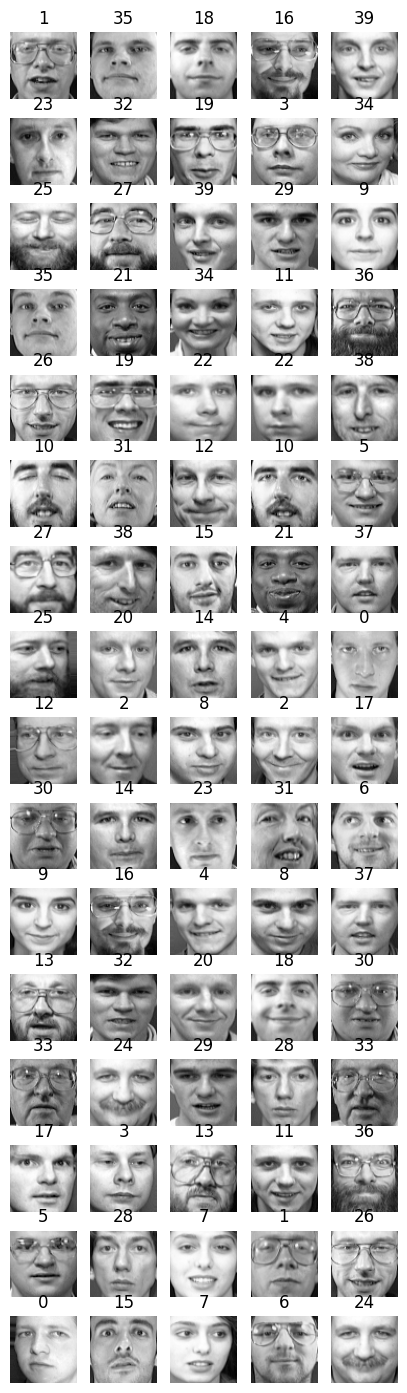

In [15]:
plot_faces(X_test.values, Y_test)

In [17]:
X_train

,0,1,2,3,4,5,6,7,8,9,...,4086,4087,4088,4089,4090,4091,4092,4093,4094,4095
303,0.611570,0.727273,0.743802,0.764463,0.764463,0.772727,0.772727,0.797521,0.801653,0.789256,...,0.508264,0.533058,0.500000,0.202479,0.033058,0.202479,0.400826,0.371901,0.479339,0.669421
220,0.409091,0.590909,0.657025,0.681818,0.694215,0.731405,0.760331,0.785124,0.776860,0.785124,...,0.247934,0.276859,0.314050,0.268595,0.247934,0.256198,0.264463,0.252066,0.276859,0.285124
68,0.231405,0.223140,0.206612,0.206612,0.198347,0.181818,0.219008,0.223140,0.231405,0.318182,...,0.384298,0.367769,0.409091,0.462810,0.504132,0.603306,0.549587,0.289256,0.194215,0.227273
377,0.285124,0.376033,0.454545,0.524793,0.578512,0.669421,0.710744,0.727273,0.731405,0.743802,...,0.272727,0.396694,0.404959,0.210744,0.351240,0.322314,0.384298,0.338843,0.322314,0.330579
312,0.508264,0.628099,0.669421,0.404959,0.533058,0.698347,0.793388,0.855372,0.838843,0.863636,...,0.107438,0.107438,0.090909,0.119835,0.095041,0.115702,0.111570,0.111570,0.119835,0.123967
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
148,0.520661,0.549587,0.586777,0.590909,0.607438,0.611570,0.648760,0.661157,0.665289,0.677686,...,0.500000,0.483471,0.438017,0.442149,0.425620,0.413223,0.400826,0.367769,0.371901,0.305785
275,0.603306,0.632231,0.652893,0.673554,0.677686,0.698347,0.731405,0.743802,0.752066,0.776860,...,0.157025,0.119835,0.136364,0.119835,0.115702,0.123967,0.140496,0.173554,0.198347,0.198347
67,0.219008,0.235537,0.252066,0.326446,0.392562,0.553719,0.714876,0.714876,0.739669,0.747934,...,0.520661,0.528926,0.545455,0.648760,0.483471,0.247934,0.223140,0.252066,0.256198,0.256198
135,0.648760,0.632231,0.702479,0.714876,0.760331,0.776860,0.789256,0.801653,0.809917,0.805785,...,0.227273,0.214876,0.177686,0.115702,0.099174,0.119835,0.078512,0.095041,0.078512,0.078512


### #1.5

Para acelerar las cosas, reduciremos la dimensionalidad de los datos utilizando PCA (técnica que veremos en el siguiente sprint). Modifica la siguiente celda de forma que las X se correspondan con las que has utilizado en el ejercicio anterior.

In [16]:
from sklearn.decomposition import PCA

pca = PCA(0.99)
X_train_pca = pca.fit_transform(X_train)
X_valid_pca = pca.transform(X_valid)
X_test_pca = pca.transform(X_test)

pca.n_components_

np.int64(126)

In [18]:
pd.DataFrame(X_train_pca)

,0,1,2,3,4,5,6,7,8,9,...,116,117,118,119,120,121,122,123,124,125
0,-3.887765,0.800411,-4.290017,-1.087975,-2.927879,3.149576,1.472634,0.747909,0.538672,-0.859134,...,0.016807,0.034629,-0.122122,0.025308,0.051270,-0.211780,0.102667,0.031051,-0.052206,0.057142
1,4.888459,1.095932,1.449300,-0.312938,-0.572651,0.526600,0.636496,-0.383721,-0.567062,0.211298,...,0.107769,-0.069905,0.101907,-0.485568,-0.145047,-0.032657,-0.313341,-0.100058,-0.072108,0.061649
2,6.779471,-2.622354,-1.937283,-0.351639,0.375836,0.320444,-1.489623,-1.195639,0.682518,-2.891224,...,-0.125145,-0.112135,-0.005284,0.160954,0.238911,-0.030758,0.014323,-0.045240,0.145217,0.130235
3,0.170227,3.100995,3.393655,3.285905,1.476935,1.990094,0.225020,-1.171166,-0.405226,-1.210186,...,0.595691,-0.278862,-0.599817,-0.094981,0.046958,-0.448446,0.041426,-0.155651,0.022008,0.350913
4,0.235484,4.294712,0.180767,-4.070516,1.029972,2.681968,-1.631915,0.566019,0.879464,-0.484618,...,0.049060,-0.207333,-0.096676,0.220363,-0.032293,-0.215269,-0.109114,0.111877,0.002762,0.097402
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
155,-0.143658,-0.465060,-1.106665,0.619097,-1.005202,-1.041461,0.511579,-1.716896,-0.633728,0.317944,...,0.186626,-0.131872,0.039289,0.147192,-0.048642,-0.064273,-0.442630,-0.008780,-0.249906,-0.112599
156,0.484165,1.496549,0.249973,-2.348069,1.261078,-3.497365,1.067875,-1.623313,-0.220820,-0.371645,...,-0.064325,0.136811,0.113102,-0.041655,-0.158021,0.106877,0.159829,0.150980,0.139322,0.294037
157,6.506197,0.943027,-1.912477,-2.631032,0.576664,1.680436,-2.560388,-0.162263,-0.483586,-0.338040,...,0.202686,-0.161275,-0.011888,-0.104376,0.169268,-0.113784,-0.267456,-0.214598,-0.381600,-0.390689
158,-1.249747,4.359469,1.485377,-0.609603,-0.732581,-1.264023,1.103600,-0.398428,2.623776,-1.760915,...,-0.036777,-0.077129,0.268590,-0.551698,-0.214790,-0.074032,0.322946,-0.057640,-0.401370,0.354864


### 1.6

Aquí viene la parte del león. A continuación, agrupa las imágenes utilizando K-Means sobre el dataset de train reducido en el ejercicio anterior. Emplea el método del máximo de score de silueta para obtener el mejor k, probando con K de 5 en 5 hasta 150. ¿Cuál es el k que proporciona el mejor score de silueta? NOTA: Emplea todas las features (no hace falta seleccionar, y ya están escaladas entre 0 y 1)

In [20]:

from sklearn.cluster import KMeans

k_range = range(5,151,5)

kmeans_per_k = []

for k in k_range:
    print(f"k={k}")
    kmeans = KMeans(n_clusters=k,n_init=10,random_state=40)
    kmeans.fit(X_train_pca)
    kmeans_per_k.append(kmeans)

k=5
k=10
k=15
k=20
k=25
k=30
k=35
k=40
k=45
k=50
k=55
k=60
k=65
k=70
k=75
k=80
k=85
k=90
k=95
k=100
k=105
k=110
k=115
k=120
k=125
k=130
k=135
k=140
k=145
k=150


In [23]:
kmeans_per_k

[KMeans(n_clusters=5, n_init=10, random_state=40),
 KMeans(n_clusters=10, n_init=10, random_state=40),
 KMeans(n_clusters=15, n_init=10, random_state=40),
 KMeans(n_clusters=20, n_init=10, random_state=40),
 KMeans(n_clusters=25, n_init=10, random_state=40),
 KMeans(n_clusters=30, n_init=10, random_state=40),
 KMeans(n_clusters=35, n_init=10, random_state=40),
 KMeans(n_clusters=40, n_init=10, random_state=40),
 KMeans(n_clusters=45, n_init=10, random_state=40),
 KMeans(n_clusters=50, n_init=10, random_state=40),
 KMeans(n_clusters=55, n_init=10, random_state=40),
 KMeans(n_clusters=60, n_init=10, random_state=40),
 KMeans(n_clusters=65, n_init=10, random_state=40),
 KMeans(n_clusters=70, n_init=10, random_state=40),
 KMeans(n_clusters=75, n_init=10, random_state=40),
 KMeans(n_clusters=80, n_init=10, random_state=40),
 KMeans(n_clusters=85, n_init=10, random_state=40),
 KMeans(n_clusters=90, n_init=10, random_state=40),
 KMeans(n_clusters=95, n_init=10, random_state=40),
 KMeans(n_clu

In [24]:
from sklearn.metrics import silhouette_score

[silhouette_score(X_train_pca, model.labels_) for model in kmeans_per_k]

[0.10823513567447662,
 0.09444939345121384,
 0.09490528702735901,
 0.09979353845119476,
 0.11105223745107651,
 0.13960443437099457,
 0.1444987952709198,
 0.16866853833198547,
 0.16269497573375702,
 0.17406311631202698,
 0.17990705370903015,
 0.1860259473323822,
 0.18865296244621277,
 0.18003053963184357,
 0.1897028237581253,
 0.18337202072143555,
 0.17756760120391846,
 0.17299820482730865,
 0.16865307092666626,
 0.15698036551475525,
 0.15161314606666565,
 0.14597401022911072,
 0.13233280181884766,
 0.13823655247688293,
 0.11901620775461197,
 0.10491389036178589,
 0.09304460138082504,
 0.08306229114532471,
 0.07101063430309296,
 0.055236417800188065]

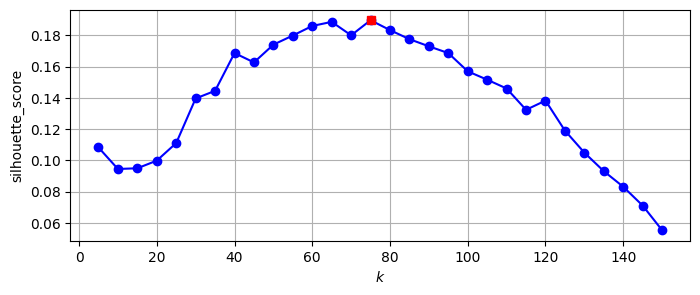

In [26]:
from sklearn.metrics import silhouette_score

silhouette_scores = [silhouette_score(X_train_pca, model.labels_) for model in kmeans_per_k]

best_index = np.argmax(silhouette_scores)
best_k = k_range[best_index]
best_score = silhouette_scores[best_index]

plt.figure(figsize=(8,3))
plt.plot(k_range,silhouette_scores, "bo-")
plt.xlabel("$k$")
plt.ylabel("silhouette_score")
plt.plot(best_k,best_score,"rs")
plt.grid()
plt.show()

### #1.7

Repite el ejercio anterior empleando ahora el método del codo de Inercia. ¿Sale algo más concluyente o que refuerce el anterior resultado?

In [25]:
[model.inertia_ for model in kmeans_per_k]

[8256.9375,
 7085.32275390625,
 6318.1884765625,
 5747.04345703125,
 5149.34423828125,
 4685.857421875,
 4166.00927734375,
 3810.14013671875,
 3449.763427734375,
 3129.35693359375,
 2794.85009765625,
 2498.72509765625,
 2279.936767578125,
 2044.1014404296875,
 1797.0712890625,
 1641.515380859375,
 1474.390380859375,
 1321.427734375,
 1178.425048828125,
 1032.7822265625,
 892.1088256835938,
 761.9066772460938,
 649.7276611328125,
 536.1236572265625,
 431.0840148925781,
 341.70819091796875,
 255.4261474609375,
 173.9100341796875,
 106.95584106445312,
 56.526641845703125]

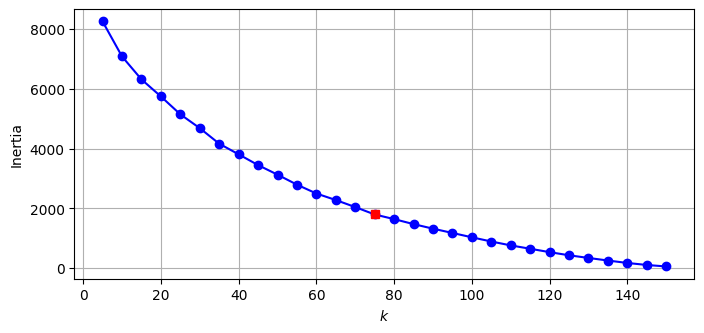

In [27]:
inertias = [model.inertia_ for model in kmeans_per_k]
best_inertia = inertias[best_index]

plt.figure(figsize=(8,3.5))
plt.plot(k_range,inertias, "bo-")
plt.xlabel("$k$")
plt.ylabel("Inertia")
plt.plot(best_k,best_inertia,"rs")
plt.grid()
plt.show()

### #1.8

Quédate con el k obtenido con el método del score de silueta y asigna el modelo con ese k a una variable `best_model`

In [29]:
best_model = kmeans_per_k[best_index]
best_model

,"n_clusters n_clusters: int, default=8The number of clusters to form as well as the number ofcentroids to generate.For an example of how to choose an optimal value for `n_clusters` refer to:ref:`sphx_glr_auto_examples_cluster_plot_kmeans_silhouette_analysis.py`.",75
,"init init: {'k-means++', 'random'}, callable or array-like of shape (n_clusters, n_features), default='k-means++'Method for initialization:* 'k-means++' : selects initial cluster centroids using sampling based on an empirical probability distribution of the points' contribution to the overall inertia. This technique speeds up convergence. The algorithm implemented is ""greedy k-means++"". It differs from the vanilla k-means++ by making several trials at each sampling step and choosing the best centroid among them.* 'random': choose `n_clusters` observations (rows) at random from data for the initial centroids.* If an array is passed, it should be of shape (n_clusters, n_features) and gives the initial centers.* If a callable is passed, it should take arguments X, n_clusters and a random state and return an initialization.For an example of how to use the different `init` strategies, see:ref:`sphx_glr_auto_examples_cluster_plot_kmeans_digits.py`.For an evaluation of the impact of initialization, see the example:ref:`sphx_glr_auto_examples_cluster_plot_kmeans_stability_low_dim_dense.py`.",'k-means++'
,"n_init n_init: 'auto' or int, default='auto'Number of times the k-means algorithm is run with different centroidseeds. The final results is the best output of `n_init` consecutive runsin terms of inertia. Several runs are recommended for sparsehigh-dimensional problems (see :ref:`kmeans_sparse_high_dim`).When `n_init='auto'`, the number of runs depends on the value of init:10 if using `init='random'` or `init` is a callable;1 if using `init='k-means++'` or `init` is an array-like... versionadded:: 1.2 Added 'auto' option for `n_init`... versionchanged:: 1.4 Default value for `n_init` changed to `'auto'`.",10
,"max_iter max_iter: int, default=300Maximum number of iterations of the k-means algorithm for asingle run.",300
,"tol tol: float, default=1e-4Relative tolerance with regards to Frobenius norm of the differencein the cluster centers of two consecutive iterations to declareconvergence.",0.0001
,"verbose verbose: int, default=0Verbosity mode.",0
,"random_state random_state: int, RandomState instance or None, default=NoneDetermines random number generation for centroid initialization. Usean int to make the randomness deterministic.See :term:`Glossary `.",40
,"copy_x copy_x: bool, default=TrueWhen pre-computing distances it is more numerically accurate to centerthe data first. If copy_x is True (default), then the original data isnot modified. If False, the original data is modified, and put backbefore the function returns, but small numerical differences may beintroduced by subtracting and then adding the data mean. Note that ifthe original data is not C-contiguous, a copy will be made even ifcopy_x is False. If the original data is sparse, but not in CSR format,a copy will be made even if copy_x is False.",True
,"algorithm algorithm: {""lloyd"", ""elkan""}, default=""lloyd""K-means algorithm to use. The classical EM-style algorithm is `""lloyd""`.The `""elkan""` variation can be more efficient on some datasets withwell-defined clusters, by using the triangle inequality. However it'smore memory intensive due to the allocation of an extra array of shape`(n_samples, n_clusters)`... versionchanged:: 0.18 Added Elkan algorithm.. versionchanged:: 1.1 Renamed ""full"" to ""lloyd"", and deprecated ""auto"" and ""full"". Changed ""auto"" to use ""lloyd"" instead of ""elkan"".",'lloyd'


### #1.9

Haz una valoración del método de clustering para el K elegido. Para ello crea un programa que recorra la lista de etiquetas dadas por "best_model" y que, haciendo uso de la función que ya te hemos proporcionado, pinte las caras asignadas a los 10 primeros clústeres. Ojo tendrás que hacer una pequeña adaptación porque las features de entrenamiento no son las features reales (son una "transformación" de estas) y si pasas el X de entrenamiento no verás nada. ¿Ves caras similares?

cluster 0


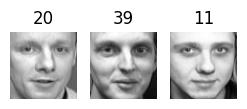

cluster 1


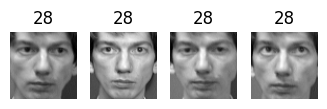

cluster 2


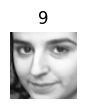

cluster 3


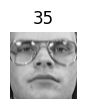

cluster 4


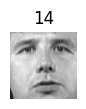

cluster 5


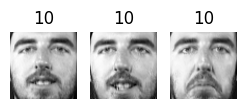

cluster 6


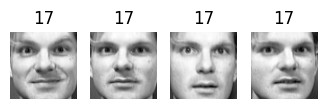

cluster 7


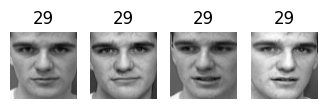

cluster 8


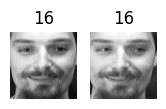

cluster 9


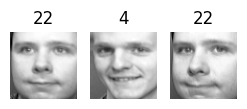

cluster 10


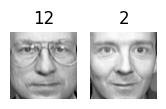

cluster 11


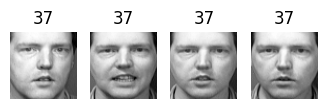

cluster 12


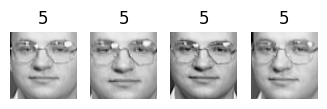

cluster 13


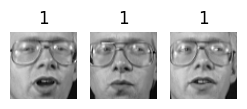

cluster 14


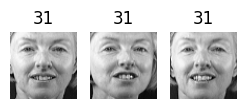

cluster 15


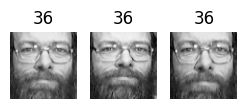

cluster 16


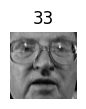

cluster 17


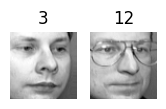

cluster 18


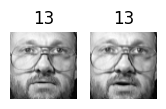

cluster 19


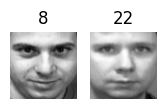

cluster 20


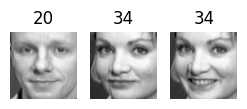

cluster 21


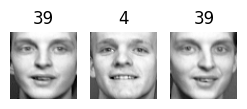

cluster 22


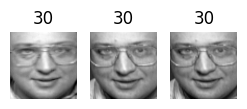

cluster 23


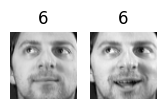

cluster 24


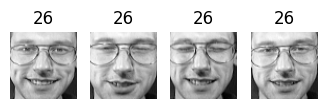

cluster 25


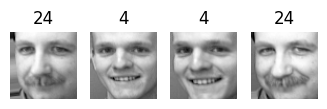

cluster 26


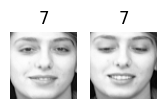

cluster 27


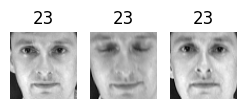

cluster 28


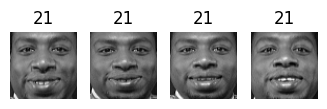

cluster 29


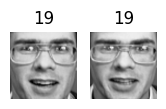

In [30]:
for cluster_id in np.unique(best_model.labels_)[0:30]:
    print("cluster", cluster_id)
    in_cluster = best_model.labels_==cluster_id
    faces = X_train[in_cluster].values
    labels = Y_train[in_cluster]
    plot_faces(faces,labels)

## **#2**


### #2.1


Continuando con el conjunto de datos de caras Olivetti, entrena un clasificador para predecir qué persona está representada en cada imagen, y evalúalo en el conjunto de validación. Utiliza un RandomForest con 150 submodelos o estimadores (y el resto de hiperparámetros déjalos a su valor por defecto)

In [31]:
len(X_train_pca)

160

In [32]:
from sklearn.ensemble import RandomForestClassifier

clf = RandomForestClassifier(n_estimators=150,random_state=42)
clf.fit(X_train_pca,Y_train)
clf.score(X_valid_pca,Y_valid)

0.8375

In [33]:
clf = RandomForestClassifier(n_estimators=150,random_state=42)
clf.fit(X_train,Y_train)
clf.score(X_valid,Y_valid)

0.79375

### #2.2

Utiliza K-Means como una herramienta de reducción de dimensionalidad y entrena un clasificador en el conjunto reducido. Para ello emplea el método transform de manera que ahora las features de entrada sean las distancias de cada punto a los centroides del modelo "best_model" de la parte anterior. Por ejemplo:
```python
X_train_reduced = best_model.transform(X_train_pca) 
```


Ojo lo tienes que aplicar a todos los datasets. Luego vuelve a entrenar un RandomForest sobre este dataset y evalualo contra el dataset de validacion.

In [34]:
best_model

,"n_clusters n_clusters: int, default=8The number of clusters to form as well as the number ofcentroids to generate.For an example of how to choose an optimal value for `n_clusters` refer to:ref:`sphx_glr_auto_examples_cluster_plot_kmeans_silhouette_analysis.py`.",75
,"init init: {'k-means++', 'random'}, callable or array-like of shape (n_clusters, n_features), default='k-means++'Method for initialization:* 'k-means++' : selects initial cluster centroids using sampling based on an empirical probability distribution of the points' contribution to the overall inertia. This technique speeds up convergence. The algorithm implemented is ""greedy k-means++"". It differs from the vanilla k-means++ by making several trials at each sampling step and choosing the best centroid among them.* 'random': choose `n_clusters` observations (rows) at random from data for the initial centroids.* If an array is passed, it should be of shape (n_clusters, n_features) and gives the initial centers.* If a callable is passed, it should take arguments X, n_clusters and a random state and return an initialization.For an example of how to use the different `init` strategies, see:ref:`sphx_glr_auto_examples_cluster_plot_kmeans_digits.py`.For an evaluation of the impact of initialization, see the example:ref:`sphx_glr_auto_examples_cluster_plot_kmeans_stability_low_dim_dense.py`.",'k-means++'
,"n_init n_init: 'auto' or int, default='auto'Number of times the k-means algorithm is run with different centroidseeds. The final results is the best output of `n_init` consecutive runsin terms of inertia. Several runs are recommended for sparsehigh-dimensional problems (see :ref:`kmeans_sparse_high_dim`).When `n_init='auto'`, the number of runs depends on the value of init:10 if using `init='random'` or `init` is a callable;1 if using `init='k-means++'` or `init` is an array-like... versionadded:: 1.2 Added 'auto' option for `n_init`... versionchanged:: 1.4 Default value for `n_init` changed to `'auto'`.",10
,"max_iter max_iter: int, default=300Maximum number of iterations of the k-means algorithm for asingle run.",300
,"tol tol: float, default=1e-4Relative tolerance with regards to Frobenius norm of the differencein the cluster centers of two consecutive iterations to declareconvergence.",0.0001
,"verbose verbose: int, default=0Verbosity mode.",0
,"random_state random_state: int, RandomState instance or None, default=NoneDetermines random number generation for centroid initialization. Usean int to make the randomness deterministic.See :term:`Glossary `.",40
,"copy_x copy_x: bool, default=TrueWhen pre-computing distances it is more numerically accurate to centerthe data first. If copy_x is True (default), then the original data isnot modified. If False, the original data is modified, and put backbefore the function returns, but small numerical differences may beintroduced by subtracting and then adding the data mean. Note that ifthe original data is not C-contiguous, a copy will be made even ifcopy_x is False. If the original data is sparse, but not in CSR format,a copy will be made even if copy_x is False.",True
,"algorithm algorithm: {""lloyd"", ""elkan""}, default=""lloyd""K-means algorithm to use. The classical EM-style algorithm is `""lloyd""`.The `""elkan""` variation can be more efficient on some datasets withwell-defined clusters, by using the triangle inequality. However it'smore memory intensive due to the allocation of an extra array of shape`(n_samples, n_clusters)`... versionchanged:: 0.18 Added Elkan algorithm.. versionchanged:: 1.1 Renamed ""full"" to ""lloyd"", and deprecated ""auto"" and ""full"". Changed ""auto"" to use ""lloyd"" instead of ""elkan"".",'lloyd'


In [35]:
X_train_reduced = best_model.transform(X_train_pca)
X_valid_reduced = best_model.transform(X_valid_pca)
X_test_reduced = best_model.transform(X_test_pca)

In [36]:
X_train_reduced

array([[1.2248500e+01, 1.2261355e+01, 1.7220943e+01, ..., 1.4902446e+01,
        1.1696378e+01, 1.0647083e+01],
       [8.0285854e+00, 1.4035076e+01, 1.1864260e+01, ..., 8.9909811e+00,
        1.0191184e+01, 1.0098387e+01],
       [1.2816611e+01, 1.6438570e+01, 1.2623309e+01, ..., 9.1986036e+00,
        1.2547522e+01, 1.4780222e+01],
       ...,
       [1.1869900e+01, 1.6419394e+01, 1.3405919e+01, ..., 1.6858739e-07,
        1.1098537e+01, 1.3012222e+01],
       [9.0027266e+00, 1.1826294e+01, 1.5870383e+01, ..., 1.3356848e+01,
        1.1273482e+01, 9.0152874e+00],
       [9.2496166e+00, 1.2012114e+01, 1.5335399e+01, ..., 1.3070616e+01,
        1.2569866e+01, 8.1156034e+00]], shape=(160, 75), dtype=float32)

In [37]:
X_valid_reduced

array([[ 8.371859 , 11.431254 , 13.538333 , ..., 11.514989 ,  9.9465475,
         8.895218 ],
       [ 8.325153 , 11.497808 , 13.547039 , ..., 12.937886 , 12.116899 ,
         9.057829 ],
       [11.770894 ,  7.8657355, 17.58577  , ..., 17.01378  , 13.821014 ,
        11.118482 ],
       ...,
       [ 9.668724 ,  8.658021 , 10.425847 , ..., 14.136112 , 11.400817 ,
        11.049064 ],
       [ 7.8389173, 12.018663 , 14.491284 , ..., 11.179512 , 10.305137 ,
         9.536625 ],
       [ 8.140317 , 11.207683 ,  8.652818 , ..., 11.431818 , 11.512769 ,
        11.196669 ]], shape=(160, 75), dtype=float32)

In [38]:
X_test_reduced

array([[ 9.075415 , 10.8431635, 14.2276535, ..., 11.997565 ,  5.953446 ,
         9.33911  ],
       [11.777799 , 13.057544 , 11.284969 , ..., 10.978383 , 10.228724 ,
        12.972695 ],
       [10.035488 , 14.256897 , 14.339248 , ...,  8.245616 ,  9.819074 ,
        10.111594 ],
       ...,
       [11.8814335, 15.783261 , 19.090883 , ..., 15.585193 , 14.177373 ,
        11.922208 ],
       [11.206777 , 15.452968 , 11.991974 , ...,  5.8683066, 10.927937 ,
        12.6707535],
       [ 6.5027657, 11.83533  , 12.15736  , ...,  9.998722 , 10.278036 ,
         7.5759645]], shape=(80, 75), dtype=float32)

In [39]:
pd.DataFrame(X_train_reduced)

,0,1,2,3,4,5,6,7,8,9,...,65,66,67,68,69,70,71,72,73,74
0,12.248500,12.261355,17.220943,12.867603,11.117604,13.079694,13.004060,9.779856,12.146799,14.339912,...,10.958786,11.966502,12.932264,15.341204,16.496059,11.469675,16.048918,1.490245e+01,11.696378,10.647083
1,8.028585,14.035076,11.864260,9.309449,9.190620,8.615853,6.020283,10.405560,9.949789,6.956538,...,13.523608,8.969661,8.788565,9.444705,10.332804,12.458721,8.611769,8.990981e+00,10.191184,10.098387
2,12.816611,16.438570,12.623309,11.082759,11.856746,13.052072,9.517079,13.829883,14.900364,9.736550,...,16.571653,13.707429,10.525994,10.953368,11.190053,14.713827,12.791987,9.198604e+00,12.547522,14.780222
3,7.488850,11.917288,14.990603,12.663256,11.796185,11.360963,8.994897,9.165180,9.523286,12.075109,...,11.349842,9.403397,12.233856,11.790716,12.690047,11.548201,11.103904,1.270912e+01,11.549451,8.441429
4,10.673651,13.818706,16.104156,13.049706,11.480655,9.498463,11.551487,11.590461,9.260457,12.819860,...,12.971840,9.503368,12.344766,12.032543,15.106374,11.303963,12.169880,1.133236e+01,10.952457,9.637336
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
155,7.569406,9.414127,12.219205,9.087913,6.733751,9.078557,7.261286,6.643945,9.163552,8.760800,...,10.168440,9.142892,7.207150,10.496658,11.370642,9.404658,10.251893,1.127633e+01,9.426242,8.408847
156,9.963184,12.002568,13.572586,11.881841,11.171519,9.607343,10.566818,11.272459,10.546165,11.656623,...,14.146727,9.701586,9.839624,12.343584,13.514445,11.385065,11.072232,1.183597e+01,10.440920,10.450413
157,11.869900,16.419394,13.405919,10.666380,10.738708,9.693585,9.100374,13.248751,12.148070,9.866212,...,15.610918,12.095002,10.076246,9.138395,11.331550,13.120224,11.459886,1.685874e-07,11.098537,13.012222
158,9.002727,11.826294,15.870383,12.846377,10.843033,10.068637,10.360660,10.290133,9.335314,13.074423,...,11.996918,7.360814,11.968784,12.315008,14.665938,10.705203,11.820042,1.335685e+01,11.273482,9.015287


In [41]:
clf = RandomForestClassifier(n_estimators=150, random_state=42)
clf.fit(X_train_reduced,Y_train)
clf.score(X_valid_reduced,Y_valid)

0.6

### #2.3 EXTRA VOLUNTARIO

Busca el número de clusters k que generen un algoritmo kmeans que a su vez sus distancias a los centroides sean las features de un clasificador RandomForest y que permita al clasificador obtener el mejor rendimiento: ¿Qué rendimiento puedes alcanzar? (en terminos de Accuracy)